## 데이터 증식

In [42]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = 'C:/datasets/cat-and-dog'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'training_set'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'training_set'),
    target_size=(64, 64),
    subset='validation'
)

Found 1821 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


## CNN모델 구성

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [44]:
trainGen.samples

1821

In [45]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [18]:
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Epoch 1/32
57/56 [==============================] - 28s 499ms/step - loss: 0.6949 - acc: 0.4896 - val_loss: 0.6942 - val_acc: 0.4994
Epoch 2/32
57/56 [==============================] - 23s 399ms/step - loss: 0.6921 - acc: 0.5118 - val_loss: 0.6925 - val_acc: 0.5476
Epoch 3/32
57/56 [==============================] - 18s 316ms/step - loss: 0.6858 - acc: 0.5632 - val_loss: 0.6957 - val_acc: 0.4860
Epoch 4/32
57/56 [==============================] - 19s 329ms/step - loss: 0.6793 - acc: 0.5747 - val_loss: 0.6970 - val_acc: 0.4933
Epoch 5/32
57/56 [==============================] - 20s 350ms/step - loss: 0.6685 - acc: 0.5879 - val_loss: 0.6981 - val_acc: 0.5707
Epoch 6/32
57/56 [==============================] - 19s 333ms/step - loss: 0.6727 - acc: 0.5914 - val_loss: 0.6911 - val_acc: 0.5413
Epoch 7/32
57/56 [==============================] - 18s 312ms/step - loss: 0.6702 - acc: 0.5977 - val_loss: 0.6870 - val_acc: 0.5413
Epoch 8/32
57/56 [==============================] - 19s 336ms/step - 

## 학습결과 시각화 및 평가

In [46]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

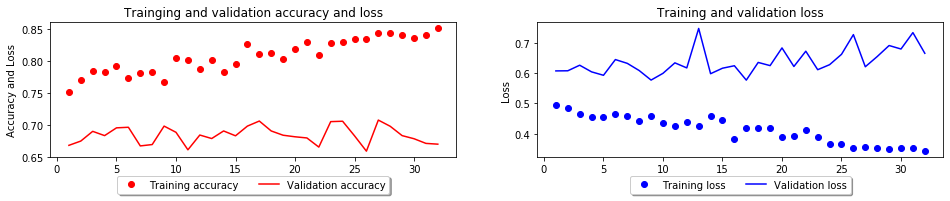

In [47]:
show_graph(history.history)

### 모델 중간 평가

In [48]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

Found 2023 images belonging to 2 classes.


[0.6932024220004678, 0.49332675]

과소적합 의심.

(추가로 32에폭을 더 돌려보겠다.)

In [23]:
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Epoch 1/32
57/56 [==============================] - 26s 456ms/step - loss: 0.4941 - acc: 0.7515 - val_loss: 0.6074 - val_acc: 0.6684
Epoch 2/32
57/56 [==============================] - 18s 311ms/step - loss: 0.4859 - acc: 0.7699 - val_loss: 0.6078 - val_acc: 0.6751
Epoch 3/32
57/56 [==============================] - 17s 290ms/step - loss: 0.4660 - acc: 0.7847 - val_loss: 0.6262 - val_acc: 0.6902
Epoch 4/32
57/56 [==============================] - 19s 331ms/step - loss: 0.4558 - acc: 0.7825 - val_loss: 0.6042 - val_acc: 0.6836
Epoch 5/32
57/56 [==============================] - 19s 340ms/step - loss: 0.4566 - acc: 0.7919 - val_loss: 0.5929 - val_acc: 0.6957
Epoch 6/32
57/56 [==============================] - 18s 322ms/step - loss: 0.4639 - acc: 0.7732 - val_loss: 0.6448 - val_acc: 0.6966
Epoch 7/32
57/56 [==============================] - 18s 324ms/step - loss: 0.4581 - acc: 0.7817 - val_loss: 0.6323 - val_acc: 0.6675
Epoch 8/32
57/56 [==============================] - 23s 399ms/step - 

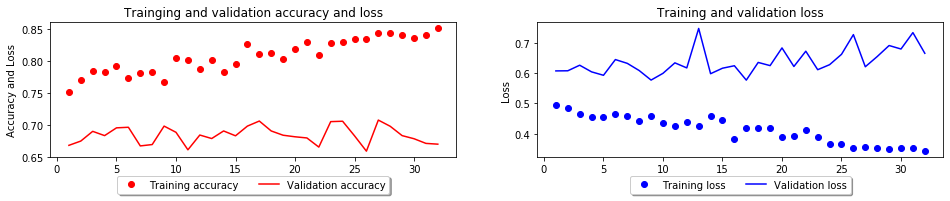

In [49]:
show_graph(history.history)

과대적합이 되어가고 있는 것 같다.

In [50]:
model.evaluate_generator(testGen)

[0.693151862360537, 0.5012358]

In [26]:
from tensorflow.keras.preprocessing.image import image
import numpy as np

예측: 개
정답: 개


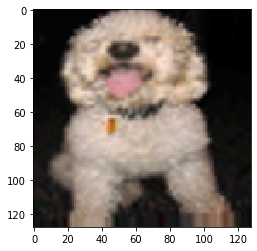

In [38]:
cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))